Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [12]:
# Import needed modules here
import matplotlib.pyplot as plt 

In [13]:
# Your code here...
def pullStateData(state,counts):
    """Retrieves covid data for the name of the input state in the first argument then the case counts as the second argument. Calculates the number of counts for specified state."""
    data = open("/home/areens/CustomFunctions_Plotting_Week11/covidData_4.7.20.csv","r") #opens input covid file 
    
    plotdictionary={} #create empty dictionary to store data 
    xlist=[] 
    #create empty x-axis data for state 
    ylist=[] 
    #create empty y-axis data for count 
    
    
    for line in data: #iterate through data
        if state in line: #if the first argument state is found in that particular line
            date, county, state, fips, cases, deaths=line.split(",") 
            if counts=="cases": #if input second argument as cases
                caseInteger=int(cases) #count the case instance and store as an integer
            if date in plotdictionary: #if the date of the case is found in the dictionary 
                plotdictionary[date]=plotdictionary[date]+caseInteger #then add the integer to the current count for that date 
            else:
                plotdictionary[date]=caseInteger #if the date does not exist, then convert to integer 
    data.close() 
    
    ylist = list(plotdictionary.values()) 
    xlist = list(plotdictionary.keys())
    #convert stored dictionary values to respective x and y list
    return xlist, ylist 
#store  values of created lists 
    

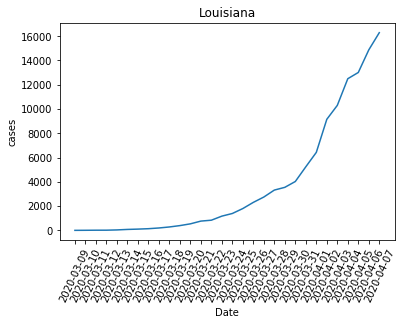

In [14]:
# Use your function to create a plot here
def plotStateGraph(state, counts="cases"):
    """Function that is nested inside pullStateData to plot the covid data for the input state & cases for that given state.""" 
    xaxis, yaxis = pullStateData(state, counts)
    plt.title(state) 
    plt.ylabel(counts) 
    plt.xlabel("Date")
    plt.xticks(rotation=65) 
    plt.plot(xaxis, yaxis)  #line plot using the xaxis and yaxis from above
    plt.show()
plotStateGraph("Louisiana","cases") #run function using Louisiana and number of cases

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [15]:
# Your code here
def pullCountyData(county,state,counts):
    """Retrieves covid data for the county as the first argument, the state as the second argument, and the counts as the third argument. Caculates the specified count. in this we will change default to deaths."""
    
    data= open("/home/areens/CustomFunctions_Plotting_Week11/covidData_4.7.20.csv","r") #opens the file to be read
    
    plotdictionary={} #create empty dictionary to store data 
    xlist=[] 
    #create empty x-axis data for state & county
    ylist=[] 
    #create empty y-axis data for count 
    
    for line in data: 
        if state in line and county in line: #if first and second arguments are found in a line 
            date, county, state, fips, cases, deaths=line.split(",") 
            if counts=="deaths": #specifying to look at death line instead of default 
                deathInteger=int(deaths) #count the death instance and store as an integer
            if date in plotdictionary:  
                plotdictionary[date]=plotdictionary[date]+deathInteger #if a date is already in the dictionary, add the integer to the existing death count for that day 
            else:
                plotdictionary[date]=deathInteger #if the date does not exist, then convert to integer
    data.close() #close the data file
    
    xlist = list(plotdictionary.keys()) 
    ylist = list(plotdictionary.values()) 
    #convert stored dictionary values to respective x and y list
    return xlist, ylist #store the values of lists

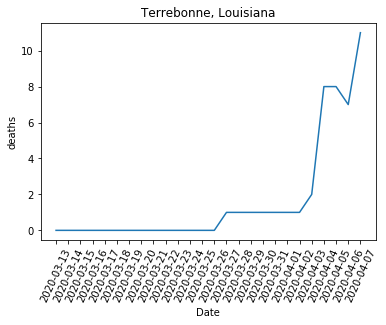

In [16]:
# Use your function to create a plot here
def plotCounty(county,state,counts="cases"):
    """Function that is nested inside pullCountyData to plot the covid data for the input county, state & cases as default. Uses death since it is specified in function.""" 
    xaxis, yaxis = pullCountyData(county,state,counts)  #create an xaxis list and yaxis list by grabbing values returned from the first function
    plt.title(county+", "+state) 
    plt.ylabel(counts) 
    plt.xticks(rotation=65) 
    plt.xlabel("Date") 
    plt.plot(xaxis, yaxis)  
    plt.show() 
plotCounty("Terrebonne","Louisiana","deaths")  #run function with Terrebonne as county, Louisiana as state, and number of deads as count
